In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('deliverytime.txt')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [6]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [9]:
R = 6371

def deg_to_rad(degrees):
    return degrees *(np.pi/180)

def distcalculate(lat1,lon1,lat2,lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df['distance'] = np.nan
for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude'], 
                                        df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])



In [10]:
print(df.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0    

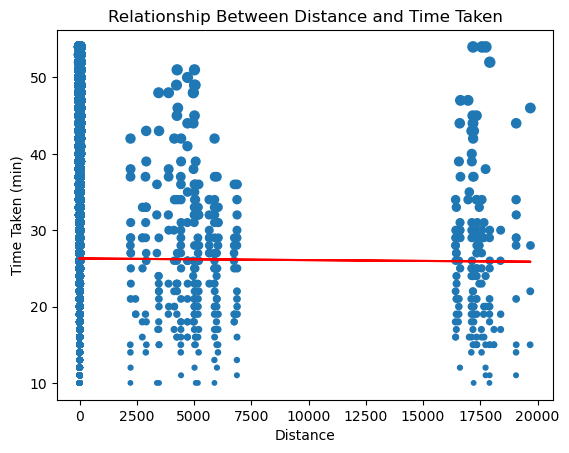

In [11]:
plt.scatter(df["distance"], df["Time_taken(min)"], s=df["Time_taken(min)"])
coefficients = np.polyfit(df["distance"], df["Time_taken(min)"], 1)
trendline = np.poly1d(coefficients)
plt.plot(df["distance"], trendline(df["distance"]), color='red')
plt.title("Relationship Between Distance and Time Taken")
plt.xlabel("Distance")
plt.ylabel("Time Taken (min)")
plt.show()

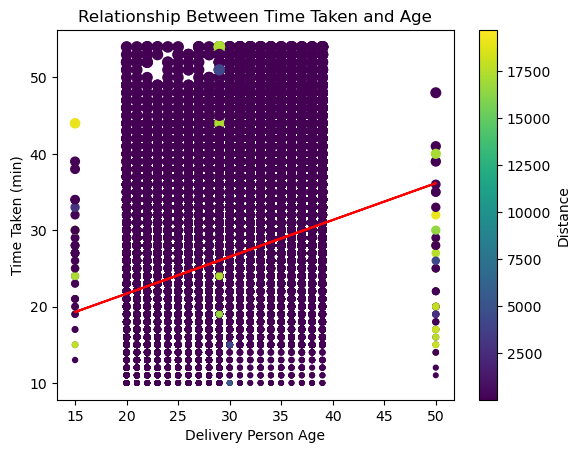

In [12]:
plt.scatter(df["Delivery_person_Age"], df["Time_taken(min)"], c=df["distance"], s=df["Time_taken(min)"])
coefficients = np.polyfit(df["Delivery_person_Age"], df["Time_taken(min)"], 1)
trendline = np.poly1d(coefficients)
plt.plot(df["Delivery_person_Age"], trendline(df["Delivery_person_Age"]), color='red')
plt.title("Relationship Between Time Taken and Age")
plt.xlabel("Delivery Person Age")
plt.ylabel("Time Taken (min)")
colorbar = plt.colorbar()
colorbar.set_label("Distance")
plt.show()

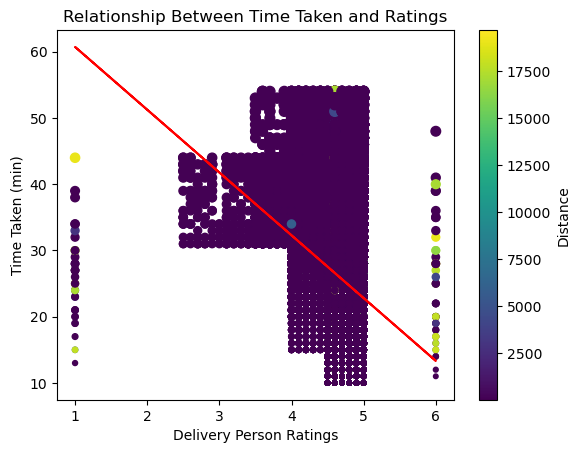

In [13]:
plt.scatter(df["Delivery_person_Ratings"], df["Time_taken(min)"], c=df["distance"], s=df["Time_taken(min)"])
coefficients = np.polyfit(df["Delivery_person_Ratings"], df["Time_taken(min)"], 1)
trendline = np.poly1d(coefficients)
plt.plot(df["Delivery_person_Ratings"], trendline(df["Delivery_person_Ratings"]), color='red')
plt.title("Relationship Between Time Taken and Ratings")
plt.xlabel("Delivery Person Ratings")
plt.ylabel("Time Taken (min)")
colorbar = plt.colorbar()
colorbar.set_label("Distance")
plt.show()

In [14]:
import plotly.express as px

fig = px.box(df, 
             x="Type_of_vehicle",
             y="Time_taken(min)", 
             color="Type_of_order")
fig.show()

# Prediction Model

In [15]:
from sklearn.model_selection import train_test_split
x = np.array(df[["Delivery_person_Age",
                 "Delivery_person_Ratings",
                 "distance"]])
y = np.array(df[["Time_taken(min)"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=9)

Epoch 1/9


2023-07-11 00:29:31.392764: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


41033/41033 [==============================] - 65s 2ms/step - loss: 69.4046
Epoch 2/9
41033/41033 [==============================] - 61s 1ms/step - loss: 63.8728
Epoch 3/9
41033/41033 [==============================] - 55s 1ms/step - loss: 61.4207
Epoch 4/9
41033/41033 [==============================] - 56s 1ms/step - loss: 60.2389
Epoch 5/9
41033/41033 [==============================] - 56s 1ms/step - loss: 59.8143
Epoch 6/9
41033/41033 [==============================] - 56s 1ms/step - loss: 59.4759
Epoch 7/9
41033/41033 [==============================] - 55s 1ms/step - loss: 59.2136
Epoch 8/9
41033/41033 [==============================] - 55s 1ms/step - loss: 58.7320
Epoch 9/9
41033/41033 [==============================] - 52s 1ms/step - loss: 58.7201


In [26]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
1/1 [==============================] - 0s 15ms/step
Predicted Delivery Time in Minutes =  [[23.607738]]
